Import libraries

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

Variables

In [2]:
# s = design variable diesel engine speed in rpm

CO2 = np.array([[ 800, 708],
                [1000, 696.889],
                [1200, 688.247],
                [1400, 682.897],
                [1700, 684.955],
                [1800, 697.3  ]])
POW = np.array([[ 800, 161.141],
                [1000, 263.243],
                [1200, 330.51 ],
                [1400, 381.561],
                [1700, 391.17 ],
                [1800, 370    ]])

def CO2func(s):
    return sp.interpolate.pchip_interpolate(CO2[:,0],CO2[:,1],s)

def POWfunc(s):
    return sp.interpolate.pchip_interpolate(POW[:,0],POW[:,1],s)

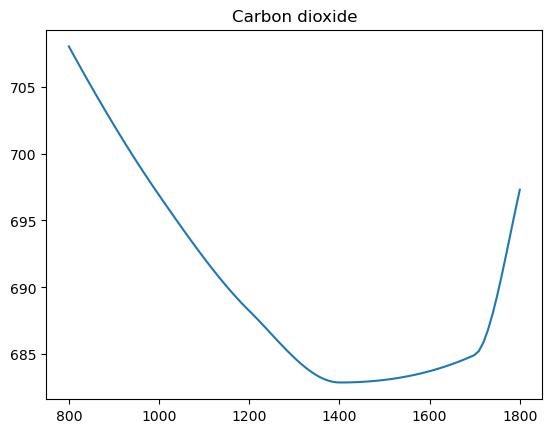

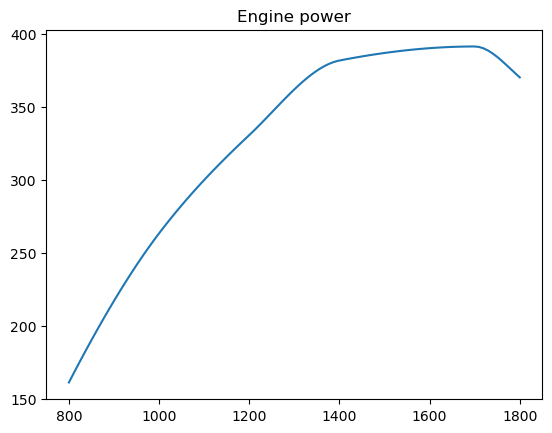

In [3]:
CO2_x = np.linspace(800,1800,100)
CO2_y = CO2func(CO2_x)
plt.plot(CO2_x,CO2_y)
plt.title('Carbon dioxide')

POW_x = np.linspace(800,1800,100)
POW_y = POWfunc(POW_x)
plt.figure()
plt.plot(POW_x,POW_y)
plt.title('Engine power');

In [5]:
def weighted_obj(s):
    delta_p = 1/3
    delta_c = 1 - delta_p
    return -delta_p * POWfunc(s) + delta_c * CO2func(s)

In [7]:
bounds = [[800,1800]]
s0 = np.array(1200)

In [8]:
result = sp.optimize.minimize(fun = weighted_obj, x0 = s0, bounds = bounds)

In [9]:
print(result)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 325.81425292950235
        x: [ 1.613e+03]
      nit: 7
      jac: [-5.684e-06]
     nfev: 26
     njev: 13
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>


In [10]:
# goal attainment

In [14]:
Pt = 460
Ct = 640
def goal_attainment(s):
    return max(Pt - POWfunc(s)) +max(CO2func(s)-Ct)

In [15]:
result2 = sp.optimize.minimize(fun = goal_attainment, x0 = s0, bounds=bounds)
print(result2)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 113.39680107686877
        x: [ 1.649e+03]
      nit: 4
      jac: [-5.684e-06]
     nfev: 20
     njev: 10
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>


In [16]:
#pareto front

In [17]:
def weighted_obj(s):
    return -delta_p * POWfunc(s) + delta_c * CO2func(s)


In [18]:
s_opt =[]
for delta_p in np.linspace(0,1,100):
    delta_c = 1- delta_p
    result_i = sp.optimize.minimize(fun = weighted_obj,x0=s0,bounds=bounds)
    s_opt.append(result_i.x)

In [19]:
s_opt

[array([1399.98664189]),
 array([1416.17202334]),
 array([1430.84250565]),
 array([1443.80885885]),
 array([1455.4110537]),
 array([1466.80021982]),
 array([1476.97800748]),
 array([1486.57913774]),
 array([1495.16060729]),
 array([1503.4511007]),
 array([1511.05438763]),
 array([1518.20603943]),
 array([1525.07208468]),
 array([1531.46161391]),
 array([1537.67899845]),
 array([1543.30015641]),
 array([1548.88095695]),
 array([1554.07633568]),
 array([1559.05303167]),
 array([1563.76086632]),
 array([1568.50340222]),
 array([1572.6633925]),
 array([1576.79315986]),
 array([1580.87413567]),
 array([1584.78292526]),
 array([1588.30392215]),
 array([1591.91807423]),
 array([1595.21335724]),
 array([1598.68176536]),
 array([1601.69934718]),
 array([1604.75504214]),
 array([1607.76430515]),
 array([1610.59066698]),
 array([1613.37008788]),
 array([1616.0282122]),
 array([1618.68916257]),
 array([1621.15626621]),
 array([1623.54639961]),
 array([1625.9106603]),
 array([1628.26226419]),
 arra

In [20]:
P_opt = POWfunc(s_opt)

In [21]:
print(P_opt)

[[381.56019783]
 [382.51068142]
 [383.33508903]
 [384.03364916]
 [384.63428399]
 [385.20102531]
 [385.68799317]
 [386.1302405 ]
 [386.51124713]
 [386.86637367]
 [387.18073334]
 [387.4664176 ]
 [387.73147643]
 [387.96995177]
 [388.19435634]
 [388.3906956 ]
 [388.57942721]
 [388.74953282]
 [388.90738651]
 [389.05209598]
 [389.1933052 ]
 [389.31337283]
 [389.42903887]
 [389.53986544]
 [389.64276214]
 [389.73271135]
 [389.82232753]
 [389.9016312 ]
 [389.98261152]
 [390.05098018]
 [390.11822671]
 [390.18249118]
 [390.24107164]
 [390.29699353]
 [390.34890587]
 [390.39933174]
 [390.44470173]
 [390.48738377]
 [390.52836808]
 [390.56791035]
 [390.60300515]
 [390.63739838]
 [390.66833594]
 [390.69964354]
 [390.72834736]
 [390.75475937]
 [390.780792  ]
 [390.80308731]
 [390.82591284]
 [390.8485428 ]
 [390.8688677 ]
 [390.88858496]
 [390.90623196]
 [390.92344796]
 [390.93827805]
 [390.95398064]
 [390.96847759]
 [390.98131679]
 [390.99448736]
 [391.0069238 ]
 [391.01793316]
 [391.02907918]
 [391.03

In [22]:
C_opt = CO2func(s_opt)

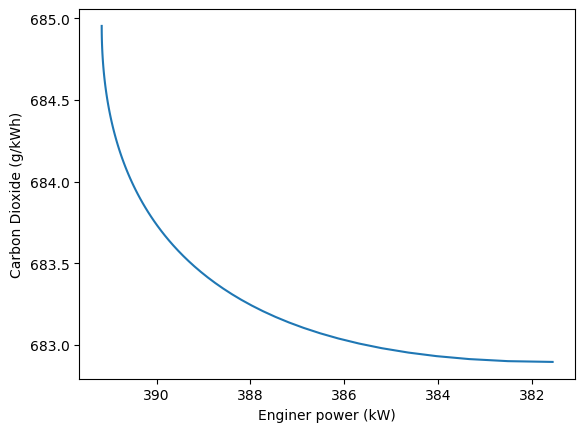

In [23]:
plt.figure()
plt.plot(P_opt,C_opt)
plt.xlabel('Enginer power (kW)')
plt.ylabel('Carbon Dioxide (g/kWh)')
ax = plt.gca()
ax.invert_xaxis()